In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Included in the data/names directory are 18 text files named as “[Language].txt”. Each file contains a bunch of names, one name per line, mostly romanized (but we still need to convert from Unicode to ASCII).

We’ll end up with a dictionary of lists of names per language, {language: [names ...]}. The generic variables “category” and “line” (for language and name in our case) are used for later extensibility.

In [2]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import unicodedata
import string

In [3]:
def findFiles(path): return glob.glob(path)

findFiles('/content/drive/MyDrive/Datasets/RNN/data/names/*.txt')

['/content/drive/MyDrive/Datasets/RNN/data/names/Japanese.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Irish.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Russian.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/English.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/German.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Polish.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Scottish.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Portuguese.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Spanish.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Arabic.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Chinese.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Italian.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Czech.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/French.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Korean.txt',
 '/content/drive/MyDrive/Datasets/RNN/data/names/Greek.txt'

In [4]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
n_letters

57

In [5]:
# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

Slusarski


In [6]:
path = '/content/drive/MyDrive/Datasets/RNN/data/names/*.txt'
os.path.splitext(os.path.basename(path))[0]

'*'

In [7]:
open("/content/drive/MyDrive/Datasets/RNN/data/names/Arabic.txt", encoding="utf-8").read()

'Khoury\nNahas\nDaher\nGerges\nNazari\nMaalouf\nGerges\nNaifeh\nGuirguis\nBaba\nSabbagh\nAttia\nTahan\nHaddad\nAswad\nNajjar\nDagher\nMaloof\nIsa\nAsghar\nNader\nGaber\nAbboud\nMaalouf\nZogby\nSrour\nBahar\nMustafa\nHanania\nDaher\nTuma\nNahas\nSaliba\nShamoon\nHandal\nBaba\nAmari\nBahar\nAtiyeh\nSaid\nKhouri\nTahan\nBaba\nMustafa\nGuirguis\nSleiman\nSeif\nDagher\nBahar\nGaber\nHarb\nSeif\nAsker\nNader\nAntar\nAwad\nSrour\nShadid\nHajjar\nHanania\nKalb\nShadid\nBazzi\nMustafa\nMasih\nGhanem\nHaddad\nIsa\nAntoun\nSarraf\nSleiman\nDagher\nNajjar\nMalouf\nNahas\nNaser\nSaliba\nShamon\nMalouf\nKalb\nDaher\nMaalouf\nWasem\nKanaan\nNaifeh\nBoutros\nMoghadam\nMasih\nSleiman\nAswad\nCham\nAssaf\nQuraishi\nShalhoub\nSabbag\nMifsud\nGaber\nShammas\nTannous\nSleiman\nBazzi\nQuraishi\nRahal\nCham\nGhanem\nGhanem\nNaser\nBaba\nShamon\nAlmasi\nBasara\nQuraishi\nBata\nWasem\nShamoun\nDeeb\nTouma\nAsfour\nDeeb\nHadad\nNaifeh\nTouma\nBazzi\nShamoun\nNahas\nHaddad\nArian\nKouri\nDeeb\nToma\nHalabi\nNaza

In [8]:
open("/content/drive/MyDrive/Datasets/RNN/data/names/Arabic.txt", encoding="utf-8").read().strip()

'Khoury\nNahas\nDaher\nGerges\nNazari\nMaalouf\nGerges\nNaifeh\nGuirguis\nBaba\nSabbagh\nAttia\nTahan\nHaddad\nAswad\nNajjar\nDagher\nMaloof\nIsa\nAsghar\nNader\nGaber\nAbboud\nMaalouf\nZogby\nSrour\nBahar\nMustafa\nHanania\nDaher\nTuma\nNahas\nSaliba\nShamoon\nHandal\nBaba\nAmari\nBahar\nAtiyeh\nSaid\nKhouri\nTahan\nBaba\nMustafa\nGuirguis\nSleiman\nSeif\nDagher\nBahar\nGaber\nHarb\nSeif\nAsker\nNader\nAntar\nAwad\nSrour\nShadid\nHajjar\nHanania\nKalb\nShadid\nBazzi\nMustafa\nMasih\nGhanem\nHaddad\nIsa\nAntoun\nSarraf\nSleiman\nDagher\nNajjar\nMalouf\nNahas\nNaser\nSaliba\nShamon\nMalouf\nKalb\nDaher\nMaalouf\nWasem\nKanaan\nNaifeh\nBoutros\nMoghadam\nMasih\nSleiman\nAswad\nCham\nAssaf\nQuraishi\nShalhoub\nSabbag\nMifsud\nGaber\nShammas\nTannous\nSleiman\nBazzi\nQuraishi\nRahal\nCham\nGhanem\nGhanem\nNaser\nBaba\nShamon\nAlmasi\nBasara\nQuraishi\nBata\nWasem\nShamoun\nDeeb\nTouma\nAsfour\nDeeb\nHadad\nNaifeh\nTouma\nBazzi\nShamoun\nNahas\nHaddad\nArian\nKouri\nDeeb\nToma\nHalabi\nNaza

In [9]:
open("/content/drive/MyDrive/Datasets/RNN/data/names/Arabic.txt", encoding="utf-8").read().strip().split("\n")[:10]

['Khoury',
 'Nahas',
 'Daher',
 'Gerges',
 'Nazari',
 'Maalouf',
 'Gerges',
 'Naifeh',
 'Guirguis',
 'Baba']

In [10]:
# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
  lines = open(filename, encoding="utf-8").read().strip().split("\n")
  return [unicodeToAscii(line) for line in lines]

for filename in findFiles(path):
  category = os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines = readLines(filename)
  category_lines[category] = lines

n_categories = len(all_categories)
n_categories

18

In [11]:
category_lines["Arabic"][0]

'Khoury'

In [12]:
all_categories

['Japanese',
 'Irish',
 'Russian',
 'English',
 'German',
 'Polish',
 'Scottish',
 'Portuguese',
 'Spanish',
 'Arabic',
 'Chinese',
 'Italian',
 'Czech',
 'French',
 'Korean',
 'Greek',
 'Dutch',
 'Vietnamese']

Now we have category_lines, a dictionary mapping each category (language) to a list of lines (names). We also kept track of all_categories (just a list of languages) and n_categories for later reference.

In [13]:
category_lines["Italian"][:5]

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']

In [14]:
for li, let in enumerate("Jones"):
  print(li, let)

0 J
1 o
2 n
3 e
4 s


Now that we have all the names organized, we need to turn them into Tensors to make any use of them.

To represent a single letter, we use a “one-hot vector” of size <1 x n_letters>. A one-hot vector is filled with 0s except for a 1 at index of the current letter, e.g. "b" = <0 1 0 0 0 ...>.

To make a word we join a bunch of those into a 2D matrix <line_length x 1 x n_letters>.

That extra 1 dimension is because PyTorch assumes everything is in batches - we’re just using a batch size of 1 here.

In [15]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
  return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
  tensor = torch.zeros(1, n_letters)
  tensor[0][letterToIndex(letter)] = 1
  return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
  tensor = torch.zeros(len(line), 1, n_letters)
  for li, letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)] = 1
  return tensor

letterToTensor("J")

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

In [16]:
lineToTensor("Jones")

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [17]:
lineToTensor("Jones").size()

torch.Size([5, 1, 57])

Before autograd, creating a recurrent neural network in Torch involved cloning the parameters of a layer over several timesteps. The layers held hidden state and gradients which are now entirely handled by the graph itself. This means you can implement a RNN in a very “pure” way, as regular feed-forward layers.

This RNN module (mostly copied from the PyTorch for Torch users tutorial) is just 2 linear layers which operate on an input and hidden state, with a LogSoftmax layer after the output.

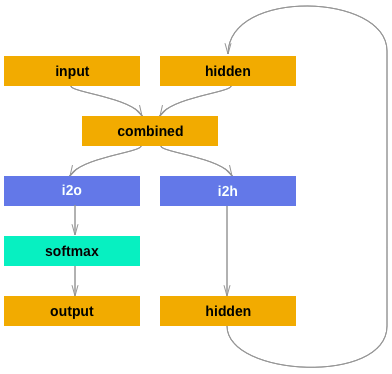

In [18]:
import torch.nn as nn

class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()

    self.hidden_size = hidden_size

    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    combined = torch.cat((input, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output, hidden

  def init_hidden(self):
    return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

To run a step of this network we need to pass an input (in our case, the Tensor for the current letter) and a previous hidden state (which we initialize as zeros at first). We’ll get back the output (probability of each language) and a next hidden state (which we keep for the next step).

In [19]:
input = letterToTensor("A")
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [20]:
output, next_hidden

(tensor([[-2.9087, -2.8493, -2.8696, -2.7946, -2.8584, -2.9996, -2.8782, -2.8748,
          -2.8813, -2.8857, -2.9950, -2.8238, -2.9643, -2.8443, -2.9162, -2.9154,
          -2.8694, -2.9234]], grad_fn=<LogSoftmaxBackward0>),
 tensor([[ 0.1102,  0.0859,  0.0747,  0.0191, -0.1160,  0.0702,  0.0581,  0.0609,
           0.0414,  0.0354, -0.0171, -0.0411,  0.0987,  0.0434, -0.1001,  0.0471,
           0.0326,  0.0339, -0.0348,  0.0278, -0.0429, -0.1083,  0.0728,  0.0362,
          -0.0432, -0.0425,  0.0059, -0.0805, -0.0407,  0.0126,  0.0418,  0.0041,
           0.0106,  0.0082,  0.1014,  0.0893, -0.0453,  0.0145,  0.0646, -0.0431,
          -0.0135, -0.0668,  0.0134,  0.0958,  0.1192,  0.0715,  0.0403, -0.0033,
           0.0389, -0.0216,  0.0675,  0.0098,  0.0349, -0.0650,  0.0261,  0.1069,
          -0.0380, -0.0834,  0.0629, -0.0503, -0.0518,  0.0049, -0.0374, -0.1175,
           0.0897,  0.0320, -0.0912, -0.0511, -0.1136, -0.0497, -0.0132, -0.0169,
          -0.0465, -0.0315,  0.0450,

For the sake of efficiency we don’t want to be creating a new Tensor for every step, so we will use lineToTensor instead of letterToTensor and use slices. This could be further optimized by pre-computing batches of Tensors.

In [21]:
input = lineToTensor("Albert")
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
output

tensor([[-2.9087, -2.8493, -2.8696, -2.7946, -2.8584, -2.9996, -2.8782, -2.8748,
         -2.8813, -2.8857, -2.9950, -2.8238, -2.9643, -2.8443, -2.9162, -2.9154,
         -2.8694, -2.9234]], grad_fn=<LogSoftmaxBackward0>)

As you can see the output is a <1 x n_categories> Tensor, where every item is the likelihood of that category (higher is more likely).

Before going into training we should make a few helper functions. The first is to interpret the output of the network, which we know to be a likelihood of each category. We can use Tensor.topk to get the index of the greatest value:

In [22]:
def categoryFromOutput(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

categoryFromOutput(output)

('English', 3)

We will also want a quick way to get a training example (a name and its language):

In [23]:
cat = torch.tensor([all_categories.index("Arabic")], dtype=torch.long)
cat

tensor([9])

In [24]:
all_categories.index("Arabic")

9

In [25]:
import random

def random_choice(l):
  return l[random.randint(0, len(l) - 1)]

def random_training_example():
  category = random_choice(all_categories)
  line = random_choice(category_lines[category])
  category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
  line_tensor = lineToTensor(line)
  return category, line, category_tensor, line_tensor

for i in range(10):
  category, line, category_tensor, line_tensor = random_training_example()
  print(f"category = {category}, line = {line}, category_tensor = {category_tensor}")

category = French, line = Gagne, category_tensor = tensor([13])
category = Dutch, line = Reijnder, category_tensor = tensor([16])
category = Scottish, line = Hunter, category_tensor = tensor([6])
category = French, line = Chevrolet, category_tensor = tensor([13])
category = Portuguese, line = Santiago, category_tensor = tensor([7])
category = Scottish, line = Williamson, category_tensor = tensor([6])
category = Scottish, line = Black, category_tensor = tensor([6])
category = Russian, line = Juhman, category_tensor = tensor([2])
category = Irish, line = Ivor, category_tensor = tensor([1])
category = Scottish, line = Clark, category_tensor = tensor([6])


Now all it takes to train this network is show it a bunch of examples, have it make guesses, and tell it if it’s wrong.

For the loss function nn.NLLLoss is appropriate, since the last layer of the RNN is nn.LogSoftmax.

In [26]:
criterion = nn.NLLLoss()

Each loop of training will:

  * Create input and target tensors

  * Create a zeroed initial hidden state

  * Read each letter in and

    * Keep hidden state for next letter

  * Compare final output to target

  * Back-propagate

  * Return the output and loss


In [27]:
line_tensor.size()

torch.Size([5, 1, 57])

In [28]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
  hidden = rnn.init_hidden()

  rnn.zero_grad()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  loss = criterion(output, category_tensor)
  loss.backward()

  # Add parameters' gradients to their values, multiplied by learning rate
  for p in rnn.parameters():
    p.data.add_(p.grad.data, alpha=-learning_rate)

  return output, loss.item()

Now we just have to run that with a bunch of examples. Since the train function returns both the output and loss we can print its guesses and also keep track of loss for plotting. Since there are 1000s of examples we print only every print_every examples, and take an average of the loss.

In [29]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def time_since(since):
  now = time.time()
  s = now - since
  m = math.floor(s/60)
  s -= m * 60
  return f"{m}m {s}s"

start = time.time()

for iter in range(1, n_iters + 1):
  category, line, category_tensor, line_tensor = random_training_example()
  output, loss = train(category_tensor, line_tensor)
  current_loss += loss

  # Print iter number, loss, name and guess
  if iter % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = '✓' if guess == category else f'✗ {category}'
    print(f"{iter} {iter / n_iters * 100}%% ({time_since(start)}) {loss:.4f} {line} / {guess} {correct}")

  # Add current loss avg to list of losses
  if iter % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0

5000 5.0%% (0m 8.459288597106934s) 2.3137 Santiago / Italian ✗ Portuguese
10000 10.0%% (0m 16.678523302078247s) 1.4418 Utagawa / Japanese ✓
15000 15.0%% (0m 25.039141178131104s) 1.4135 Kaczka / Polish ✓
20000 20.0%% (0m 33.131614208221436s) 3.2336 Aonghus / Greek ✗ Irish
25000 25.0%% (0m 41.44898223876953s) 1.1878 Basara / Arabic ✓
30000 30.0%% (0m 49.69390368461609s) 2.2242 Sutherland / English ✗ Scottish
35000 35.0%% (0m 58.28246831893921s) 1.6521 Jirovy / Czech ✓
40000 40.0%% (1m 6.4537835121154785s) 1.2463 Kalogeria / Greek ✓
45000 45.0%% (1m 14.590118169784546s) 5.1559 Mas / Chinese ✗ Dutch
50000 50.0%% (1m 22.65907335281372s) 2.6808 Abel / Dutch ✗ French
55000 55.00000000000001%% (1m 30.792279720306396s) 2.4105 Kava / Czech ✗ Polish
60000 60.0%% (1m 39.19002890586853s) 0.0054 Kozlowski / Polish ✓
65000 65.0%% (1m 47.50018334388733s) 2.6910 Nagel / Arabic ✗ Dutch
70000 70.0%% (1m 55.93514108657837s) 3.1595 Christie / Greek ✗ Scottish
75000 75.0%% (2m 4.494821548461914s) 0.3253 Kik

Plotting the historical loss from all_losses shows the network learning:

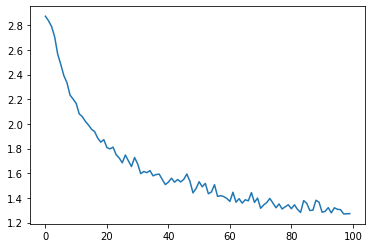

In [31]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

To see how well the network performs on different categories, we will create a confusion matrix, indicating for every actual language (rows) which language the network guesses (columns). To calculate the confusion matrix a bunch of samples are run through the network with evaluate(), which is the same as train() minus the backprop.

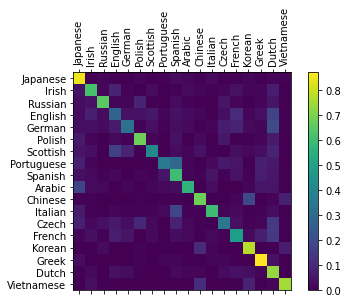

In [32]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
  hidden = rnn.init_hidden()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
  category, line, category_tensor, line_tensor = random_training_example()
  output = evaluate(line_tensor)
  guess, guess_i = categoryFromOutput(output)
  category_i = all_categories.index(category)
  confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
  confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

You can pick out bright spots off the main axis that show which languages it guesses incorrectly, e.g. Chinese for Korean, and Spanish for Italian. It seems to do very well with Greek, and very poorly with English (perhaps because of overlap with other languages).

In [33]:
def predict(input_line, n_predictions=3):
  print(f"\n {input_line}")
  with torch.no_grad():
    output = evaluate(lineToTensor(input_line))

    # Get top N categories
    topv, topi = output.topk(n_predictions, 1, True)
    predictions = []

    for i in range(n_predictions):
      value = topv[0][i].item()
      category_index = topi[0][i].item()
      print(f"({value:.2f}) {all_categories[category_index]}")
      predictions.append([value, all_categories[category_index]])

In [34]:
predict('Dovesky')
predict('Jackson')
predict('Satoshi')


 Dovesky
(-0.76) Czech
(-1.01) Russian
(-2.42) Polish

 Jackson
(-0.74) English
(-2.04) Scottish
(-2.28) Dutch

 Satoshi
(-0.77) Japanese
(-1.91) Italian
(-2.11) Polish
